In [6]:
from qiskit import QuantumCircuit
import numpy as np
from matplotlib import pyplot as plt
from qiskit.providers.aer import AerSimulator

In [29]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.rz(-np.pi/2,0)
qc.cy(1,0)
qc.h(0)
qc.h(1)
qc.measure(1,1)
qc.draw()

┌───┐┌──────────┐┌───┐┌───┐   
q_0: ┤ H ├┤ Rz(-π/2) ├┤ Y ├┤ H ├───
     ├───┤└──────────┘└─┬─┘├───┤┌─┐
q_1: ┤ H ├──────────────■──┤ H ├┤M├
     └───┘                 └───┘└╥┘
c_0: ════════════════════════════╬═
                                 ║ 
c_1: ════════════════════════════╩═

In [30]:
AerSimulator().run(qc).result().get_counts()

{'10': 1024}

In [32]:
shots = 5000
def angle_measure(theta):
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.h(1)
    qc.rz(theta,0)
    qc.cy(1,0)
    qc.h(0)
    qc.h(1)
    qc.measure(1,1)
    qc.draw()
    counts = AerSimulator(shots = shots).run(qc).result().get_counts()
    return (counts.get('00',0)-counts.get('10',0))/shots

In [33]:
angles = np.linspace(0,2*np.pi,100)
expectations = [angle_measure(angle) for angle in angles]

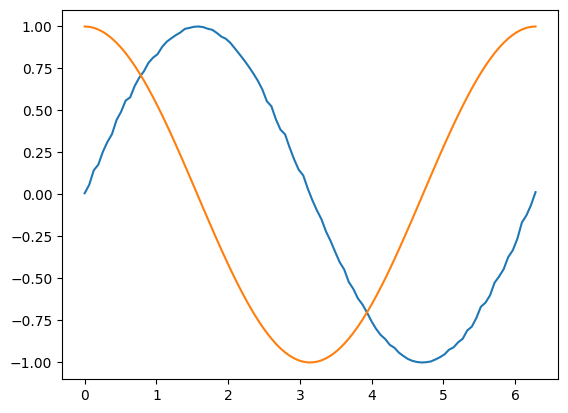

In [34]:
plt.plot(angles, expectations)
plt.plot(angles, np.cos(angles))